# SI 618: Data Manipulation and Analysis
## 06 - Categorical Data & Text Processing 
### Contingency tables, crosstabs, mosaic plots and chi-squared
### Introduction to text processing
### Dr. Chris Teplovs, School of Information, University of Michigan
<small><a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a> This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.</small>
    
### Please ensure you have this version:
Version 2023.10.02.1.CT


# Categorical Data

Categorical data are those that can take on one of a limited number of values (i.e. categories) (Wikipedia)

Examples: blood type (A, B, AB, O); types of rock (sedimentary, metamorphic, igneous).

## Contingency tables, crosstabs, and chi-square

In [311]:
import pandas as pd
import seaborn as sns

from statsmodels.graphics.mosaicplot import mosaic
from scipy.stats import chi2_contingency

Let's generate a data frame to play with:

In [312]:
df = pd.DataFrame(
    {'color': ['red', 'green', 'green', 'black'] * 6,
     'make':['ford', 'toyota', 'dodge'] * 8,
     'vehicleClass': ['suv', 'suv', 'suv', 'car', 'car', 'truck'] * 4}
)

In [313]:
df

,color,make,vehicleClass
0,red,ford,suv
1,green,toyota,suv
2,green,dodge,suv
3,black,ford,car
4,red,toyota,car
5,green,dodge,truck
6,green,ford,suv
7,black,toyota,suv
8,red,dodge,suv
9,green,ford,car


In [314]:
df.shape

(24, 3)

One of the most basic transformations we can do is a crosstab:

In [315]:
ct = pd.crosstab(df.color, df.vehicleClass)
ct

vehicleClass,car,suv,truck
color,,,
black,2,2,2
green,4,6,2
red,2,4,0


Notice how similar it is to pivoting.  In fact, go ahead and use ```pivot_table``` to do the same sort of transformation:

### <font color="magenta">Q1: Use ```pivot_table``` to create a DataFrame similar to the one from the ```crosstab``` above:

In [316]:
# insert your code here
pd.pivot_table(df, index='color', columns='vehicleClass', aggfunc=len).fillna(0)

make           
vehicleClass  car  suv truck
color                       
black         2.0  2.0   2.0
green         4.0  6.0   2.0
red           2.0  4.0   0.0

Let's make sure we have the right data in `ct`:

In [317]:
ct = pd.crosstab(df.color, df.vehicleClass)
ct

vehicleClass,car,suv,truck
color,,,
black,2,2,2
green,4,6,2
red,2,4,0


As usual, we would like to visualize our results:

<Axes: xlabel='vehicleClass', ylabel='color'>

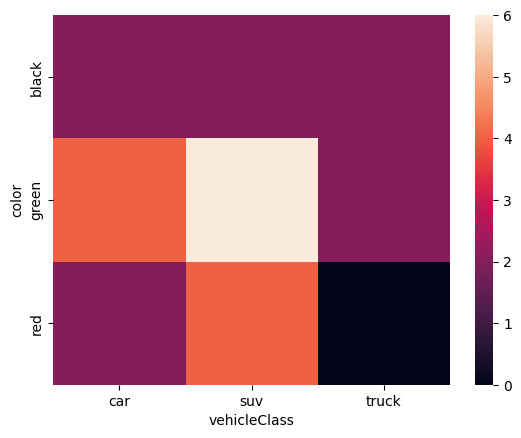

In [318]:
sns.heatmap(ct, annot=False)

<Axes: xlabel='vehicleClass', ylabel='color'>

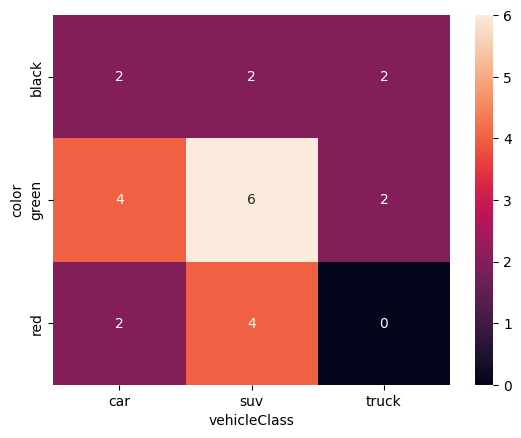

In [319]:
sns.heatmap(ct,annot=True)

You might want to investigate other palettes, see https://seaborn.pydata.org/tutorial/color_palettes.html for more details.



<Axes: xlabel='vehicleClass', ylabel='color'>

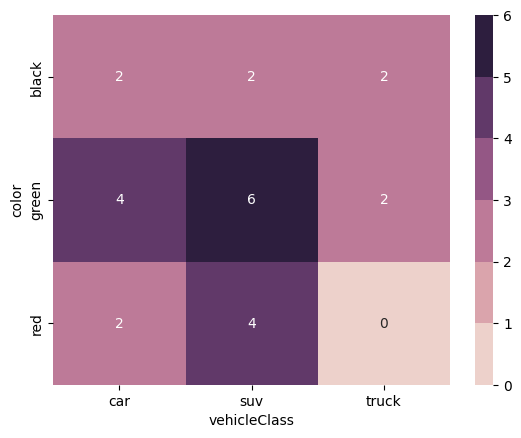

In [320]:
sns.heatmap(ct, annot=True, cmap=sns.cubehelix_palette())

<Axes: xlabel='vehicleClass', ylabel='color'>

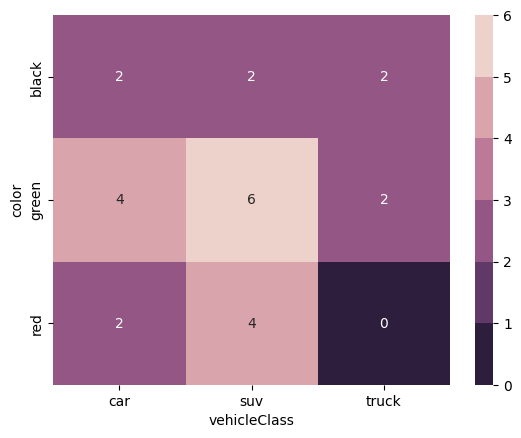

In [321]:
sns.heatmap(ct,annot=True,cmap=sns.cubehelix_palette(reverse=True))

### Titanic data

One of the more popular datasets that we use for experimenting with crosstabs is the 
survivor data from the Titanic disaster:

In [322]:
titanic = pd.read_csv('https://raw.githubusercontent.com/umsi-data-science/data/main/titanic.csv')

In [323]:
titanic.sample(5)

,passtype,age,status,sex
1341,crew,adult,dead,male
1398,third,adult,dead,female
519,third,adult,dead,male
1561,first,adult,alive,male
1352,crew,adult,dead,male


Let's create a crosstab of the data:

In [324]:
ct = pd.crosstab(titanic.passtype,
                titanic.status,
                margins=False)
ct

status,alive,dead
passtype,,
crew,212,673
first,203,122
second,118,167
third,178,528


<Axes: xlabel='status', ylabel='passtype'>

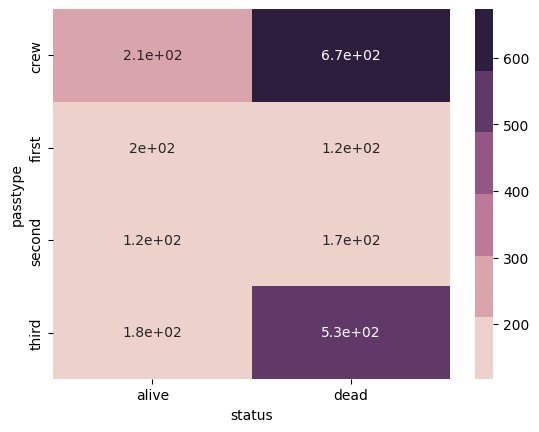

In [325]:
sns.heatmap(ct,annot=True,cmap=sns.cubehelix_palette())

Does scientific notation bother you?  Change the format with the ```fmt=``` argument:

<Axes: xlabel='status', ylabel='passtype'>

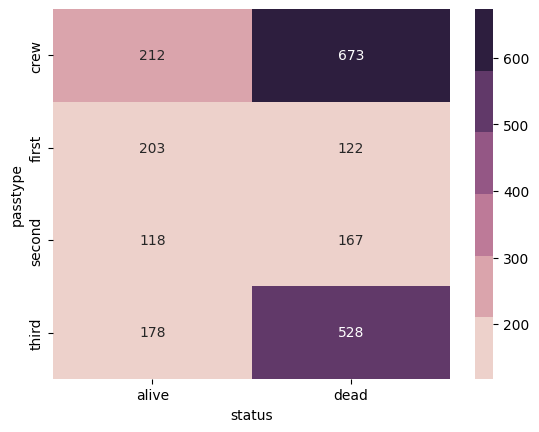

In [326]:
sns.heatmap(ct,annot=True,cmap=sns.cubehelix_palette(),fmt='d')

### <font color="magenta"> Q2: Is there something interesting here?</font>

Insert your answer here.

In addition to the heatmap shown above, we can use a mosaic plot to visualize 
contingency tables:

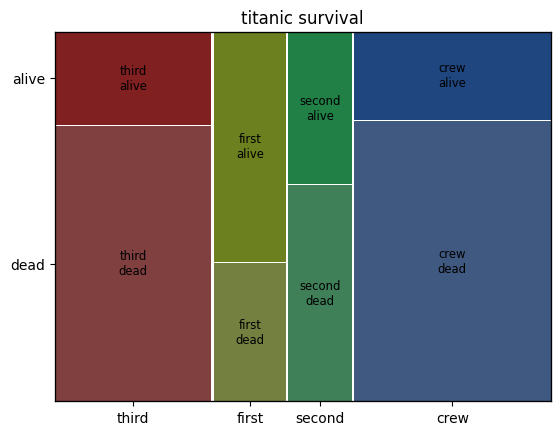

In [327]:
t = mosaic(titanic, ['passtype', 'status'], title='titanic survival')

Let's take a look at the "expected" values for each cell.  That is,
the values that we would expect if there was no effect of "passtype" on "status".  To do this, let's take a look at the marginal totals:

In [328]:
ct = pd.crosstab(titanic.passtype, titanic.status, margins=True)
ct

status,alive,dead,All
passtype,,,
crew,212,673,885
first,203,122,325
second,118,167,285
third,178,528,706
All,711,1490,2201


The **expected** value for each cell (i.e. the value that you would expect if there was no interaction between passtype and status in this dataset) can be calculated by taking the row total multiplied by the column total and divided by the overall total.  

So we would get the following expected value for alive crew:

In [329]:
exp = ct['All'].loc['first'] * ct['alive'].loc['All'] / ct['All'].loc['All']

In [330]:
exp

104.98636983189459

You could repeat this for each cell (or write code to do so), but you get the idea.

## Let's talk about $ \chi^2 $



Finally, we can go beyond visual exploration and apply analytic tests to see if the 
observed values differ from the expected ones.  The chi-square test sums the squares of the differences
between the observed and expected values, normalized for the expected values.

Our null hypothesis is that there is no difference in survivorship based on passage type.

Here's a video resource that explains chi-squared:

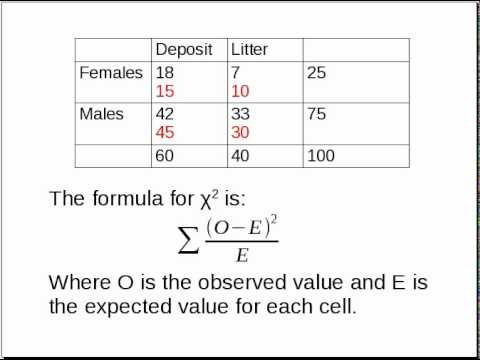

In [331]:
from IPython.display import YouTubeVideo
vid = YouTubeVideo("VskmMgXmkMQ")
display(vid)

In [332]:
ct = pd.crosstab(titanic.passtype, titanic.status, margins=True)

In [333]:
ct

status,alive,dead,All
passtype,,,
crew,212,673,885
first,203,122,325
second,118,167,285
third,178,528,706
All,711,1490,2201


In [334]:
ct = pd.crosstab(titanic.passtype, titanic.status, margins=False, normalize=False)

In [335]:
chi2, p, dof, expected = chi2_contingency(ct)

print("chi^2 = ", chi2)
print("p-val = ", p)
print("degree of freedom = ", dof)

chi^2 =  190.4011036168333
p-val =  4.999927529867932e-41
degree of freedom =  3


As a bonus, we also get a DataFrame of the expected values:

In [336]:
pd.DataFrame(expected)

,0,1
0,285.885961,599.114039
1,104.986370,220.013630
2,92.064970,192.935030
3,228.062699,477.937301


## Let's apply these ideas to another dataset

For this component, we'll use the Comic Characters data set:

In [337]:
comic_characters = pd.read_csv("https://raw.githubusercontent.com/umsi-data-science/data/main/comic_characters.csv", index_col="id")
comic_characters.tail()

,publisher,name,Identity,align,eye,hair,sex,alive,appearances,first_appearance,month,year,date
id,,,,,,,,,,,,,
23268,DC,Nadine West (New Earth),Public Identity,Good Characters,NaN,NaN,Female Characters,Living Characters,NaN,NaN,1,NaN,NaN
23269,DC,Warren Harding (New Earth),Public Identity,Good Characters,NaN,NaN,Male Characters,Living Characters,NaN,NaN,1,NaN,NaN
23270,DC,William Harrison (New Earth),Public Identity,Good Characters,NaN,NaN,Male Characters,Living Characters,NaN,NaN,1,NaN,NaN
23271,DC,William McKinley (New Earth),Public Identity,Good Characters,NaN,NaN,Male Characters,Living Characters,NaN,NaN,1,NaN,NaN
23272,DC,Mookie (New Earth),Public Identity,Bad Characters,Blue Eyes,Blond Hair,Male Characters,Living Characters,NaN,NaN,1,NaN,NaN


### Example

We'd like to know which publisher uses different 'identity' types for their characters? Have DC characters appeared more publicly? What is the average number of times Marvel Characters appeared known to authorities identity?

In [338]:
comic_characters.groupby(['Identity', 'publisher'])['appearances'].mean().unstack().fillna(0)

publisher,DC,Marvel
Identity,,
Identity Unknown,3.000000,0.000000
Known to Authorities Identity,0.000000,74.400000
No Dual Identity,0.000000,24.402013
Public Identity,28.287166,23.407615
Secret Identity,32.655157,17.379794


Alternatively, we can use .pivot_table(). For example:

In [339]:
avg_appearance_per_identity = comic_characters.pivot_table(
    index='Identity',
    columns='publisher',
    values='appearances',
    aggfunc='mean'
)
avg_appearance_per_identity.fillna(0).head()

publisher,DC,Marvel
Identity,,
Identity Unknown,3.000000,0.000000
Known to Authorities Identity,0.000000,74.400000
No Dual Identity,0.000000,24.402013
Public Identity,28.287166,23.407615
Secret Identity,32.655157,17.379794


For .pivot_table(), you need to specify these four arguments:
1. index: the field that will become the index of the output table
2. columns: the field that will become the columns of the output table
3. values: the field to be aggregated/summarized
4. aggfunc: the aggregation operator applied to values, if there are more than 1 entry corresponding to each (index, column) pair, such as "mean", "count", "max"
    

### Let's warm up with a few groupby and pivot_table exercises:

What is the total number of appearances of characters for each publisher?

In [340]:
a = comic_characters.groupby('publisher')[['appearances']].sum()
a.head()

,appearances
publisher,
DC,154532.0
Marvel,260270.0


What is the total number of appearances of characters by each publisher in each year? Output a table.

In [341]:
b = comic_characters.groupby(['year', 'publisher'])['appearances'].sum().fillna(0)
b

year    publisher
1935.0  DC            125.0
1936.0  DC            240.0
1937.0  DC            458.0
1938.0  DC           1639.0
1939.0  DC           4067.0
                      ...  
2011.0  Marvel       1890.0
2012.0  DC             17.0
        Marvel       1072.0
2013.0  DC              1.0
        Marvel       1177.0
Name: appearances, Length: 154, dtype: float64

### Can we improve that output?

Try unstacking it...

In [342]:
b = comic_characters.groupby(['year','publisher'])['appearances'].sum().unstack().fillna(0)
b.head(10)

publisher,DC,Marvel
year,,
1935.0,125.0,0.0
1936.0,240.0,0.0
1937.0,458.0,0.0
1938.0,1639.0,0.0
1939.0,4067.0,1013.0
1940.0,9123.0,2160.0
1941.0,6945.0,5371.0
1942.0,4068.0,401.0
1943.0,1475.0,541.0


### <font color="magenta">Q3: Construct a contingency table of sex and character alignment normalized by all values.</font>

Display the normalized values in percentage (%) format. Use brief sentences to explain your findings.  

Hint: use "normalize=all" in your crosstab statement.  What does normalize do? (read the docs)

Your output should look like the following:


<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>align</th>
      <th>Bad Characters</th>
      <th>Good Characters</th>
      <th>Neutral Characters</th>
      <th>Reformed Criminals</th>
    </tr>
    <tr>
      <th>sex</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Agender Characters</th>
      <td>0.10%</td>
      <td>0.05%</td>
      <td>0.07%</td>
      <td>0.00%</td>
    </tr>
    <tr>
      <th>Female Characters</th>
      <td>8.22%</td>
      <td>13.01%</td>
      <td>4.37%</td>
      <td>0.01%</td>
    </tr>
    <tr>
      <th>Genderfluid Characters</th>
      <td>0.00%</td>
      <td>0.01%</td>
      <td>0.01%</td>
      <td>0.00%</td>
    </tr>
    <tr>
      <th>Genderless Characters</th>
      <td>0.06%</td>
      <td>0.03%</td>
      <td>0.02%</td>
      <td>0.00%</td>
    </tr>
    <tr>
      <th>Male Characters</th>
      <td>39.51%</td>
      <td>25.13%</td>
      <td>9.40%</td>
      <td>0.01%</td>
    </tr>
    <tr>
      <th>Transgender Characters</th>
      <td>0.01%</td>
      <td>0.00%</td>
      <td>0.00%</td>
      <td>0.00%</td>
    </tr>
  </tbody>
</table>
</div>

In [343]:
# insert your code here
ct = pd.crosstab(
    comic_characters['sex'],
    comic_characters['align'],
    normalize=True
).applymap(lambda x: "{:.2f}%".format(x*100))
ct

align,Bad Characters,Good Characters,Neutral Characters,Reformed Criminals
sex,,,,
Agender Characters,0.10%,0.05%,0.07%,0.00%
Female Characters,8.22%,13.01%,4.37%,0.01%
Genderfluid Characters,0.00%,0.01%,0.01%,0.00%
Genderless Characters,0.06%,0.03%,0.02%,0.00%
Male Characters,39.51%,25.13%,9.40%,0.01%
Transgender Characters,0.01%,0.00%,0.00%,0.00%


### <font color="magenta">Q4: Create a mosaic plot of align and alive.  
Conduct a $\chi^2$ test of ```align``` and ```alive```. Please specify your (null and alternative) hypotheses and explain your findings.

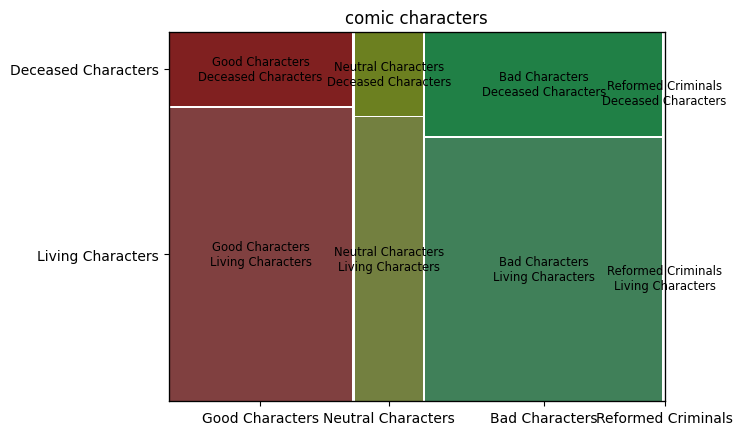

In [344]:
# insert your code here
t=mosaic(comic_characters, ['align', 'alive'], title='comic characters')

In [345]:
# insert your code here
ct = pd.crosstab(
    comic_characters['alive'],
    comic_characters['align'],
    normalize=False
)
ct

align,Bad Characters,Good Characters,Neutral Characters,Reformed Criminals
alive,,,,
Deceased Characters,2732,1513,635,1
Living Characters,6882,5954,2138,2


In [346]:
chi2, p, dof, expected = chi2_contingency(ct)

print("chi^2 = ", chi2)
print("p-val = ", p)
print("degree of freedom = ", dof)

chi^2 =  155.77673609805584
p-val =  1.4943918171359309e-33
degree of freedom =  3


In [347]:
pd.DataFrame(expected)

,0,1,2,3
0,2363.193534,1835.44478,681.624263,0.737423
1,7250.806466,5631.55522,2091.375737,2.262577


Insert your interpretation here.
Row 0 and Column 0: The value 2363.193534 represents the expected value or count for the intersection of category 0 (both in row and column).
Row 0 and Column 1: The value 1835.44478 represents the expected value or count for the intersection of category 0 (row) and category 1 (column).
Row 0 and Column 2: The value 681.624263 represents the expected value or count for the intersection of category 0 (row) and category 2 (column).
Row 0 and Column 3: The value 0.737423 represents the expected value or count for the intersection of category 0 (row) and category 3 (column).

# BREAK!

# Text Processing I: Basics and Regular Expressions

As usual, let's load up some data:

In [348]:
reviews = pd.read_csv('https://raw.githubusercontent.com/umsi-data-science/data/main/amazon_food_reviews.zip')

Let's take a really small sample, just so we can experiment with the various 

In [349]:
reviews_sample = reviews.head(10)

In [350]:
reviews_sample

,Id,ProductId,User Id,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


In [351]:
# Write code to extract the column that contains the user id:
reviews_sample['User Id ']

0    A3SGXH7AUHU8GW
1    A1D87F6ZCVE5NK
2     ABXLMWJIXXAIN
3    A395BORC6FGVXV
4    A1UQRSCLF8GW1T
5     ADT0SRK1MGOEU
6    A1SP2KVKFXXRU1
7    A3JRGQVEQN31IQ
8    A1MZYO9TZK0BBI
9    A21BT40VZCCYT4
Name: User Id , dtype: object

Let's review some basic string functionality from Pandas that can be applied to any Series or Index:

In [352]:
reviews_sample.ProfileName.str.lower()

0                         delmartian
1                             dll pa
2    natalia corres "natalia corres"
3                               karl
4      michael d. bigham "m. wassir"
5                     twoapennything
6                  david c. sullivan
7                 pamela g. williams
8                           r. james
9                      carol a. reed
Name: ProfileName, dtype: object

In [353]:
reviews_sample.ProfileName.str.upper()

0                         DELMARTIAN
1                             DLL PA
2    NATALIA CORRES "NATALIA CORRES"
3                               KARL
4      MICHAEL D. BIGHAM "M. WASSIR"
5                     TWOAPENNYTHING
6                  DAVID C. SULLIVAN
7                 PAMELA G. WILLIAMS
8                           R. JAMES
9                      CAROL A. REED
Name: ProfileName, dtype: object

In [354]:
reviews_sample.Summary.str.len()

0    21
1    17
2    21
3    14
4    11
5    10
6    45
7    22
8    10
9    16
Name: Summary, dtype: int64

Remember, the ```columns``` attribute of a DataFrame is an Index object, which means that we can use str operators on the column names:

In [355]:
reviews_sample.columns

Index(['Id', 'ProductId', 'User Id ', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [356]:
reviews_sample

,Id,ProductId,User Id,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


In [357]:
reviews_sample.columns.str.lower()

Index(['id', 'productid', 'user id ', 'profilename', 'helpfulnessnumerator',
       'helpfulnessdenominator', 'score', 'time', 'summary', 'text'],
      dtype='object')

Notice that the "User Id" column of the dataframe looks weird:  it has a space in the middle *and* at the end.  Columns that are named like that will invariable trip us up in downstream (i.e. later) analyses, so it's wise to correct them now.  Something like the following can help:

In [358]:
reviews_sample.columns.str.strip().str.lower().str.replace(' ', '_')

Index(['id', 'productid', 'user_id', 'profilename', 'helpfulnessnumerator',
       'helpfulnessdenominator', 'score', 'time', 'summary', 'text'],
      dtype='object')

And we can assign that back to the columns attribute to actually rename the columns:


In [359]:
reviews_sample.columns = reviews_sample.columns.str.strip().str.lower().str.replace(' ', '_')

In [360]:
reviews_sample

,id,productid,user_id,profilename,helpfulnessnumerator,helpfulnessdenominator,score,time,summary,text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


### Splitting and Replacing Strings

Sometimes, we want to split strings into lists.  We might want to do that with the "summary" column:

In [361]:
reviews_sample.productid.head()

0    B001E4KFG0
1    B00813GRG4
2    B000LQOCH0
3    B000UA0QIQ
4    B006K2ZZ7K
Name: productid, dtype: object

In [362]:
reviews_sample.productid.str.split('00')

0    [B, 1E4KFG0]
1    [B, 813GRG4]
2    [B, 0LQOCH0]
3    [B, 0UA0QIQ]
4    [B, 6K2ZZ7K]
5    [B, 6K2ZZ7K]
6    [B, 6K2ZZ7K]
7    [B, 6K2ZZ7K]
8    [B, 0E7L2R4]
9    [B, 171APVA]
Name: productid, dtype: object

In [363]:
reviews_sample.productid.str.split('00').str.get(1)

0    1E4KFG0
1    813GRG4
2    0LQOCH0
3    0UA0QIQ
4    6K2ZZ7K
5    6K2ZZ7K
6    6K2ZZ7K
7    6K2ZZ7K
8    0E7L2R4
9    171APVA
Name: productid, dtype: object

Equivalently:

In [364]:
reviews_sample.productid.str.split('00').str[1]

0    1E4KFG0
1    813GRG4
2    0LQOCH0
3    0UA0QIQ
4    6K2ZZ7K
5    6K2ZZ7K
6    6K2ZZ7K
7    6K2ZZ7K
8    0E7L2R4
9    171APVA
Name: productid, dtype: object

### Replace (regex time!)

In [365]:
reviews_sample.summary

0                            Good Quality Dog Food
1                                Not as Advertised
2                            "Delight" says it all
3                                   Cough Medicine
4                                      Great taffy
5                                       Nice Taffy
6    Great!  Just as good as the expensive brands!
7                           Wonderful, tasty taffy
8                                       Yay Barley
9                                 Healthy Dog Food
Name: summary, dtype: object

In [366]:
reviews_sample.summary.str.lower().str.replace('dog', 'health')

0                         good quality health food
1                                not as advertised
2                            "delight" says it all
3                                   cough medicine
4                                      great taffy
5                                       nice taffy
6    great!  just as good as the expensive brands!
7                           wonderful, tasty taffy
8                                       yay barley
9                              healthy health food
Name: summary, dtype: object

### Extracting Substrings

In [367]:
reviews_sample.summary.head(10)

0                            Good Quality Dog Food
1                                Not as Advertised
2                            "Delight" says it all
3                                   Cough Medicine
4                                      Great taffy
5                                       Nice Taffy
6    Great!  Just as good as the expensive brands!
7                           Wonderful, tasty taffy
8                                       Yay Barley
9                                 Healthy Dog Food
Name: summary, dtype: object

In [368]:
reviews_sample.summary.str.extract(r'(Dog)')

,0
0,Dog
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,Dog


In [369]:
reviews_sample.summary

0                            Good Quality Dog Food
1                                Not as Advertised
2                            "Delight" says it all
3                                   Cough Medicine
4                                      Great taffy
5                                       Nice Taffy
6    Great!  Just as good as the expensive brands!
7                           Wonderful, tasty taffy
8                                       Yay Barley
9                                 Healthy Dog Food
Name: summary, dtype: object

In [370]:
reviews_sample.summary.str.extract(r'(Dog|Taffy)')

,0
0,Dog
1,NaN
2,NaN
3,NaN
4,NaN
5,Taffy
6,NaN
7,NaN
8,NaN
9,Dog


In [371]:
reviews_sample.summary.str.extract(r'(Dog|[Tt]affy)')

,0
0,Dog
1,NaN
2,NaN
3,NaN
4,taffy
5,Taffy
6,NaN
7,taffy
8,NaN
9,Dog


In [372]:
# returns a Series
reviews_sample.summary.str.extract(r'(Dog|[Tt]affy)', expand = False)

0      Dog
1      NaN
2      NaN
3      NaN
4    taffy
5    Taffy
6      NaN
7    taffy
8      NaN
9      Dog
Name: summary, dtype: object

In [373]:
reviews_sample.summary.str.extractall(r'(Dog|[Tt]affy)')

,,0
,match,
0,0,Dog
4,0,taffy
5,0,Taffy
7,0,taffy
9,0,Dog


In [374]:
reviews_sample.summary.str.extractall(r'(a)')

0
  match   
0 0      a
1 0      a
2 0      a
  1      a
4 0      a
  1      a
5 0      a
6 0      a
  1      a
  2      a
  3      a
7 0      a
  1      a
8 0      a
  1      a
9 0      a

In [375]:
reviews_sample.summary

0                            Good Quality Dog Food
1                                Not as Advertised
2                            "Delight" says it all
3                                   Cough Medicine
4                                      Great taffy
5                                       Nice Taffy
6    Great!  Just as good as the expensive brands!
7                           Wonderful, tasty taffy
8                                       Yay Barley
9                                 Healthy Dog Food
Name: summary, dtype: object

In [376]:
reviews_sample.summary.str.extractall(r'(a)')

0
  match   
0 0      a
1 0      a
2 0      a
  1      a
4 0      a
  1      a
5 0      a
6 0      a
  1      a
  2      a
  3      a
7 0      a
  1      a
8 0      a
  1      a
9 0      a

### Testing for Strings that Match or Contain a Pattern

In [377]:
reviews_sample.text.iloc[0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [378]:
pattern = r'[Gg]ood'

In [379]:
reviews_sample.text.str.contains(pattern)

0     True
1    False
2    False
3     True
4    False
5    False
6    False
7     True
8    False
9     True
Name: text, dtype: bool

In [380]:
reviews_sample.text.str.match(pattern)

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: text, dtype: bool

In [381]:
pattern = r'.*[Gg]ood.*'

In [382]:
reviews_sample.text.str.match(pattern)

0     True
1    False
2    False
3     True
4    False
5    False
6    False
7     True
8    False
9     True
Name: text, dtype: bool

In [383]:
pattern = r'\d+'
reviews[reviews.Text.str.match(pattern)]

,Id,ProductId,User Id,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
1098,1099,B0025ULYKI,AJOVLH67GULJD,"drhughes ""drhughes""",0,0,3,1335830400,OPEN BAG OF CHIPS!!!,4 bags of chips were open when I received the ...
1124,1125,B001KVLDBI,A691XU34BVWME,J. Mohr,0,0,5,1332720000,All cherry - I couldn't find it in stores.,"3 boxes, under $6 each for all cherry - great ..."
3693,3694,B000ER1DIM,A2Y1NAULT5YJUI,Lookingforabargain,0,0,5,1316390400,Great taste!,15 month old loves to eat them on the go! They...
4023,4024,B000UZVPKO,A29313797NGT9L,Eddie Wannabee,3,4,4,1252713600,I like these!,4.5. Just water and large pieces of sardines. ...
4092,4093,B001EW5YQS,A1OY9LNIROSE3E,rockmesteady,1,1,4,1300579200,great product! unbeatable price!!,3 years ago I bought a Digidesign 002 protools...
...,...,...,...,...,...,...,...,...,...,...
97601,97602,B0010EI0QG,A1FZ07KUSFGJHZ,X. Cheng,68,69,5,1190937600,It really kills early or middle phase cancers,"8 years ago, I was desperate trying to find a ..."
97686,97687,B004G91Z5K,AMZLWVSCNYIA8,Ronald R. Bryant,1,3,1,1316822400,crazy,44 dollars for one can of corned beef.... are ...
97826,97827,B0040J7HIU,A15E0F6KPECQW1,"J. Daniel ""JD""",2,4,3,1320105600,Good stuff but 30g of sugar :O,30g of sugar in a tiny little piece which you ...
98507,98508,B004GW6O9E,A1G9WRE72195UJ,"Leah ""amazonregular""",0,0,5,1277683200,Healthy! Banana is another winner.,1st is lime. So simple and good. Clif bars a...


#### Helpful resources:
- Pandas text documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html
- Regex Cheat Sheet: https://regexr.com/

### <font color="magenta">Q4: How many rows from the Amazon Food Reviews data set contain the word ```vegan``` in the  ```Text``` column?</font>

In [384]:
pattern = "[Vv]egan\w+"
reviews.Text.str.contains(pattern).sum()

60

In [385]:
reviews.Text[reviews.Text.str.contains(pattern)]

5174     I love gummy bears. Love. I also love to eat h...
8772     Agar is basically gelatin for vegans, (or vege...
10624    I was looking for an additional source of prot...
12835    Vegan. Natural. Raw. Kosher. Wonderful whole r...
13754    Vegan. Natural. Spicy snack mix also with swee...
13793    I enjoy weekend backpacking adventures, and I ...
14289    Kombu is a wonderful energizer, especially dur...
14913    Although I love to cook, I rarely if ever bake...
15462    The oatmeal itself is tasty and pretty healthf...
25670    Upon receiving these, I was very surprised reg...
25693    First, a bunch of us tried this product, but r...
25694    We tried this product, a bunch of us. And we a...
25721    I'm an avowed omnivore.  I love me some jerky,...
25738    I love this product as a way to get protein in...
26443    Vegan. Natural. Kosher. Beautiful, classic yel...
27111    Its a great tasting tea with subtle hint of ma...
27212    Soyrizo is the best thing to ever happen to ve.

### <font color="magenta">Q5: How many rows from the Amazon Food Reviews data set contain HTML tags in the ```Text``` column?</font>
Hint: here's how to find an HTML tag: https://stackoverflow.com/questions/45999415/removing-html-tags-in-pandas.  Explain what the regex means.

In [386]:
reviews.Text.str.contains(r'<[^<>]*>').sum()

26575

### <font color="magenta">  Stretch: Remove all HTML tags from the Amazon Food Reviews text column and save the results to a column called text_no_html.

In [390]:
# insert your code here
reviews['text_no_html'] = reviews.Text.str.replace(r'<[^<>]*>', '', regex=True)

In [392]:
reviews['text_no_html'].str.contains(r'<[^<>]*>').sum()

0